# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('Wholesale_Data.csv')
raw_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.

In [3]:
# We can drop the first 2 columns, channel and region as we wouldn't use them based on this project
data = raw_data.drop(columns=['Channel', 'Region'])
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
# Check the shape of our dataframe
data.shape

(440, 6)

In [5]:
# Check info along with null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [6]:
# Check for duplicate values
data.duplicated().sum()

0

- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.

In [7]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


We can see outliers being present from the summary statistics.

- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.

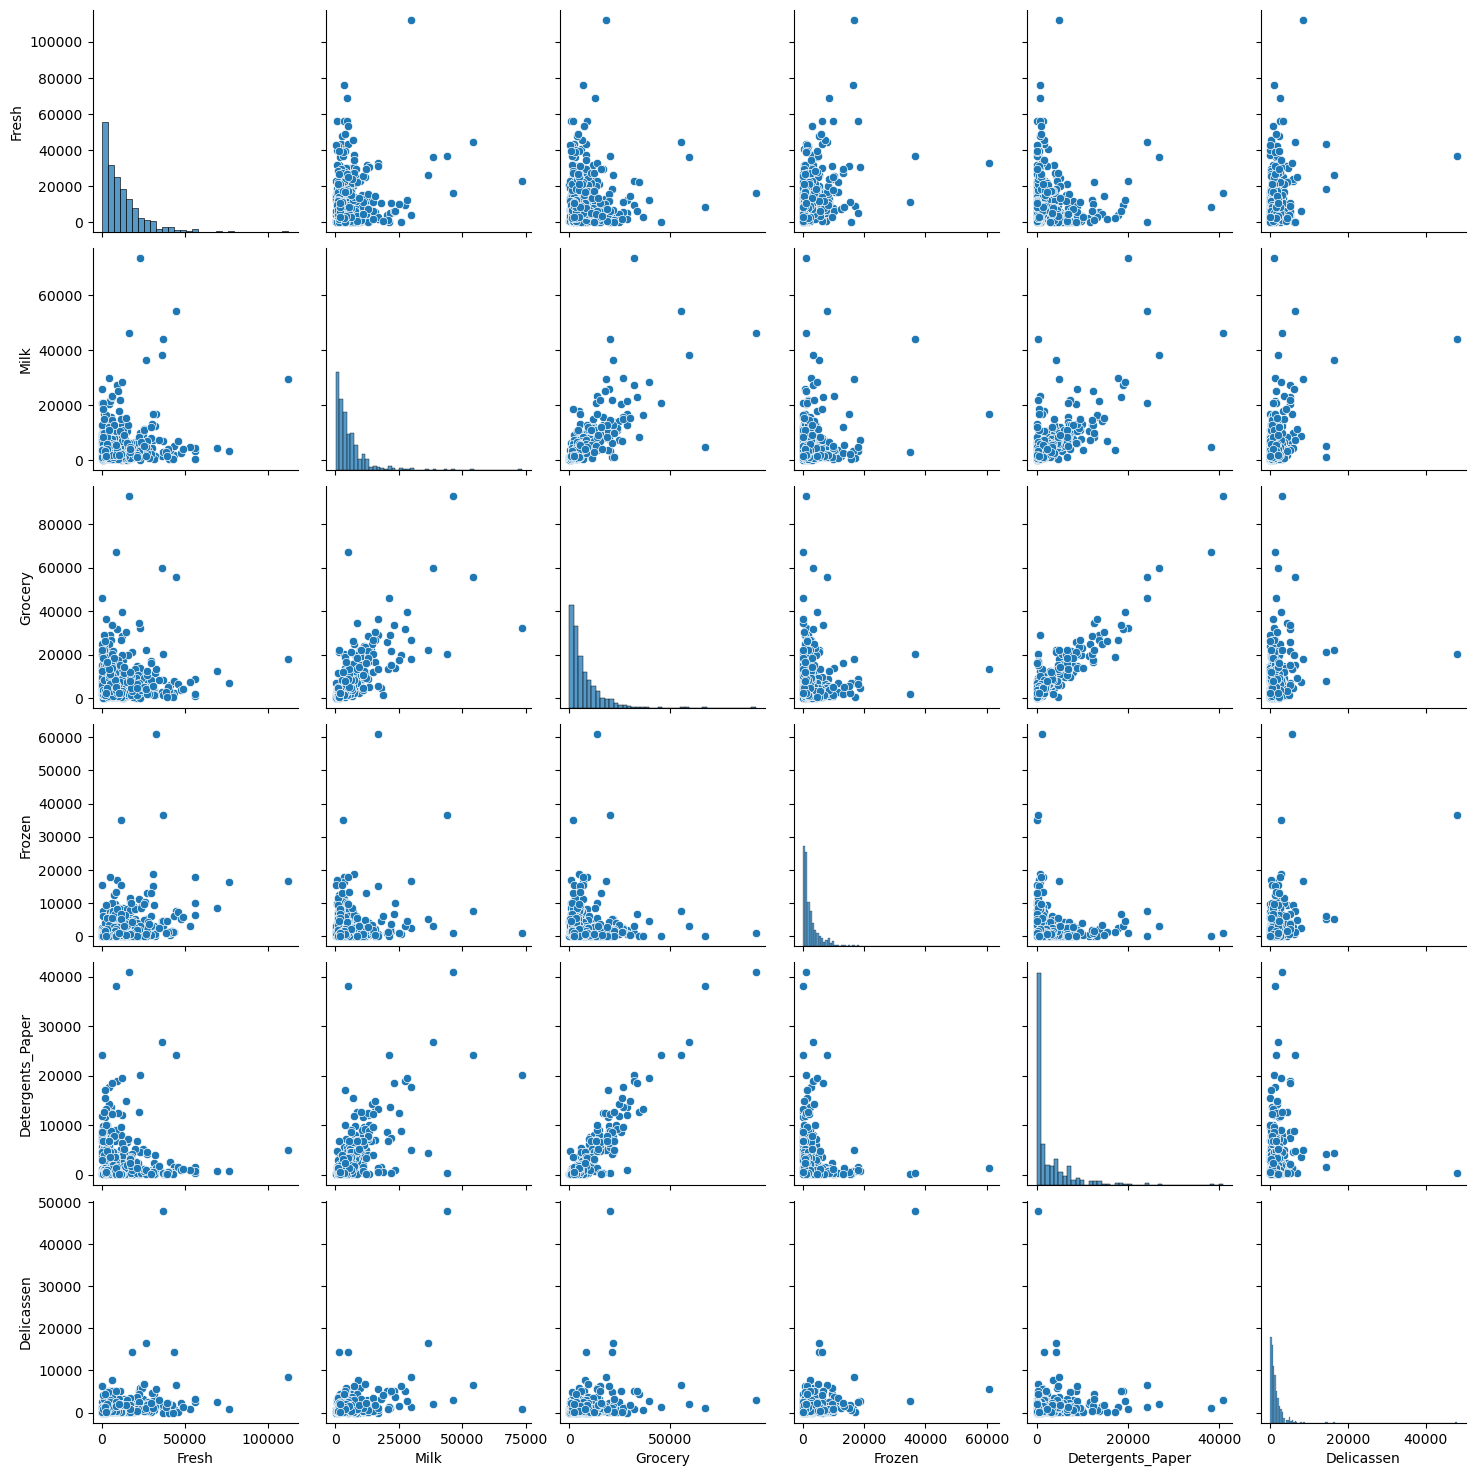

In [8]:
# First we check the pairplot
sns.pairplot(data)
plt.show()

Looking at the histogram plots, data is positively skewed / right skewed distribution. We can use log transformation to fix it.

In [103]:
# Log transformation
log_data = np.log(data)
log_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


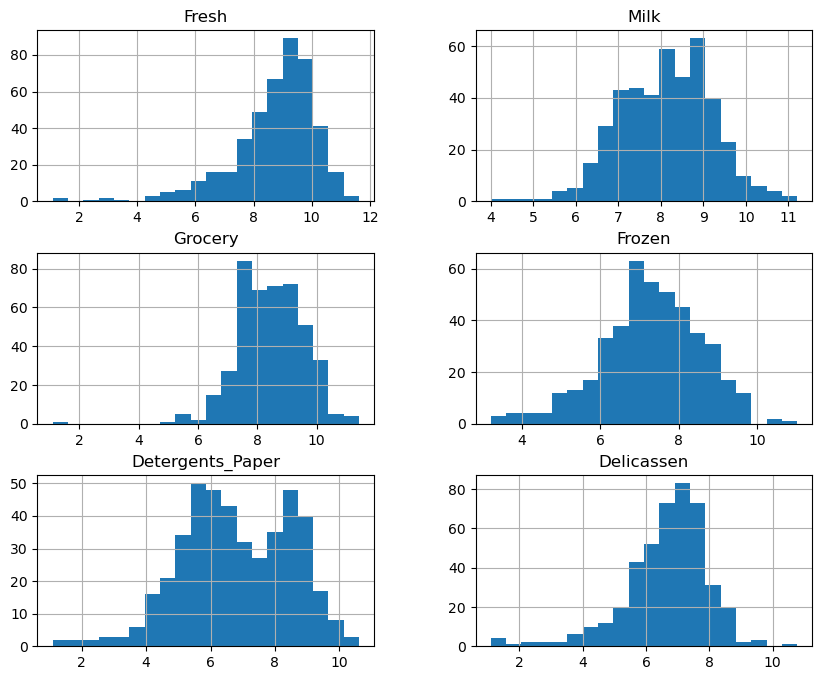

In [10]:
# We can visualize the new data to check the difference
log_data.hist(bins=20, figsize=(10, 8)) 
plt.show()

- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.

In [11]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()

print(outliers_count)

print(f"Original data Outliers:", outliers_count.sum())

Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64
Original data Outliers: 172


In [12]:
Q1 = log_data.quantile(0.25)
Q3 = log_data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
log_outliers = ((log_data < (Q1 - 1.5 * IQR)) | (log_data > (Q3 + 1.5 * IQR)))
log_outliers_count = log_outliers.sum()

print(log_outliers_count)

print(f"Log data Outliers:", log_outliers_count.sum())

Fresh               16
Milk                 4
Grocery              2
Frozen              10
Detergents_Paper     2
Delicassen          14
dtype: int64
Log data Outliers: 48


<Axes: >

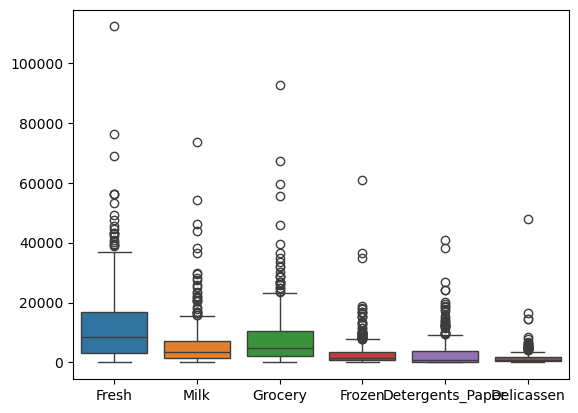

In [13]:
# Original data outlier visualization
sns.boxplot(data=data)

<Axes: >

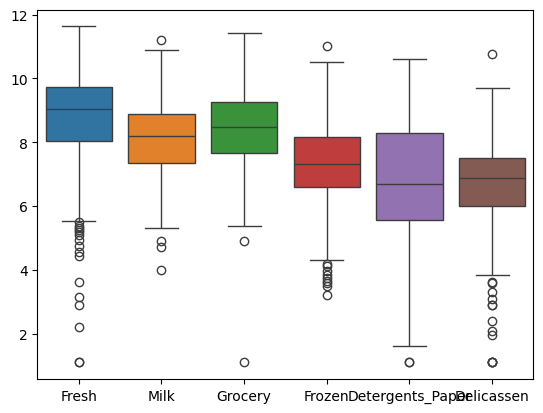

In [14]:
# Log transformed data outlier visualization
sns.boxplot(data=log_data)

After using log transformation, we not only normilized our distribution but also reduced outlier count from 172 to 48.

Now we can simply drop the outliers from our log_data without any worries.

In [15]:
# We will drop outliers from our log transformed data
data_clean = log_data[~log_outliers.any(axis=1)]

In [16]:
data_clean.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [17]:
data_clean.shape

(398, 6)

<Axes: >

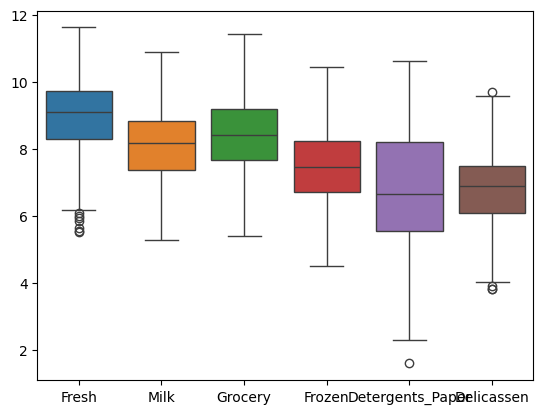

In [18]:
sns.boxplot(data=data_clean)

- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.

In [19]:
data_clean.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,-0.064710,-0.057071,0.340518,-0.146229,0.191783
Milk,-0.064710,1.000000,0.780132,-0.074227,0.672005,0.385632
Grocery,-0.057071,0.780132,1.000000,-0.145911,0.793325,0.319726
Frozen,0.340518,-0.074227,-0.145911,1.000000,-0.181654,0.223868
Detergents_Paper,-0.146229,0.672005,0.793325,-0.181654,1.000000,0.174856
Delicassen,0.191783,0.385632,0.319726,0.223868,0.174856,1.000000


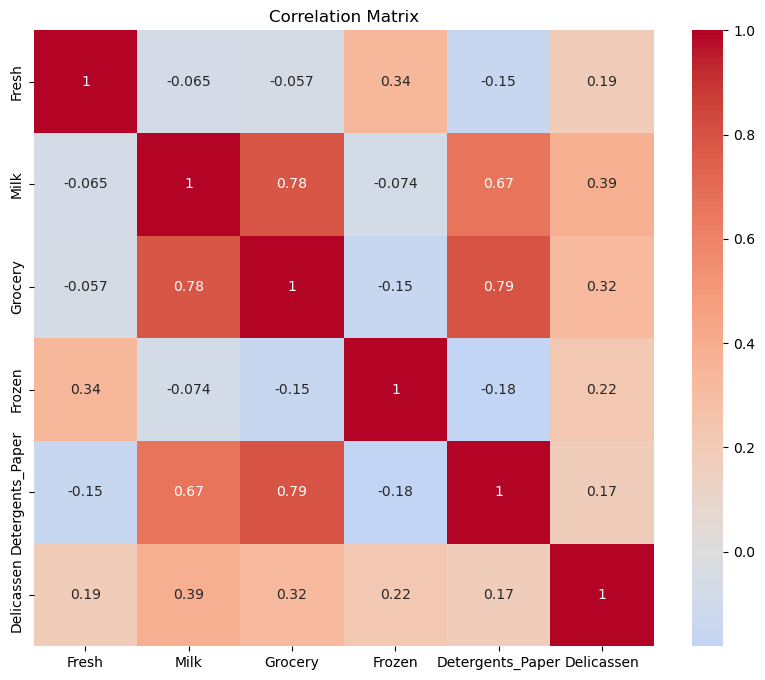

In [20]:
# Now we check the correlation between features of our clean data
clean_correlation = data_clean.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(clean_correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

1. Milk and Grocery have a strong positive correlation of 0.78, meaning as milk sales increase, grocery sales tend to increase as well.
2. Detergents_Paper and Grocery also show a strong positive correlation of 0.79, suggesting that these two categories are likely to be purchased together.
3. Frozen and Grocery have a weak negative correlation of -0.15, indicating there’s no strong inverse relationship between the two.
4. Fresh shows weak or no correlation with most other product categories (e.g., Milk, Grocery, Detergents_Paper), suggesting it behaves independently compared to others.
5. Delicassen has moderate positive correlations with Milk (0.39), Grocery (0.32), and Frozen (0.22), suggesting a modest relationship with these categories.

Milk, Grocery, and Detergents_Paper show significant relationships with each other, while Fresh and Delicassen seem more independent in their spending patterns.

- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.

In [21]:
data_clean.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,8.933438,8.121251,8.418637,7.429215,6.787511,6.801190
std,1.116110,1.007751,1.011809,1.129943,1.610957,1.029976
min,5.541264,5.303305,5.407172,4.510860,1.609438,3.828641
25%,8.304866,7.376038,7.661527,6.721426,5.573103,6.105339
50%,9.116895,8.191878,8.427922,7.455588,6.669498,6.905249
75%,9.739143,8.825039,9.186270,8.228172,8.205335,7.512071
max,11.627601,10.901524,11.437986,10.463360,10.617099,9.712509


As we have seen before by looking at the histogram plots, original data was positively skewed / right skewed distribution. Thus, we have used log transformation and also got rid of outliers.

- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [22]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

_(We set the OMP_NUM_THREADS environment variable to limit the number of threads that MKL uses to avoid memory leaks in windows)_

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
# First we standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

To determine how many clusters k we should use we can use elbow method plot to score

In [25]:
# score inertia for different values of k
inertia = []
k_range = range(1, 11) # 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

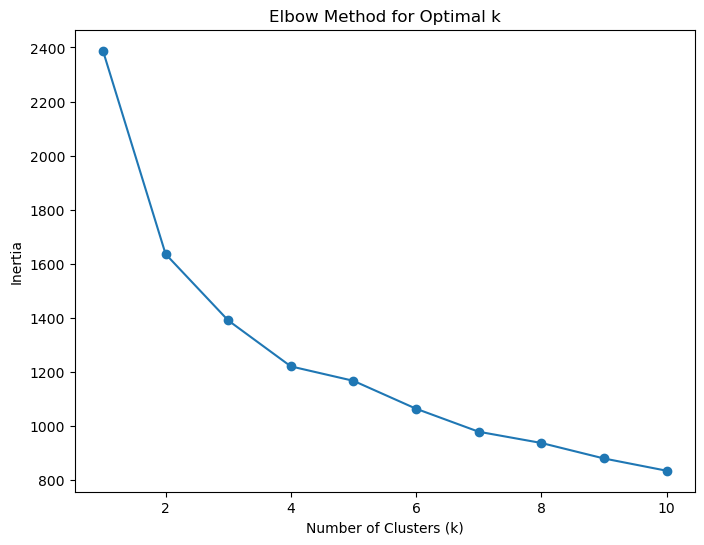

In [35]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

We can see that the optimal number of clusters is 4

In [43]:
# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Create a new copy of data_clean
km_data = data_clean.copy()

# Get the cluster labels
km_data['km_cluster'] = kmeans.labels_

In [44]:
km_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,km_cluster
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,0
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,0
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,0
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,2
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2


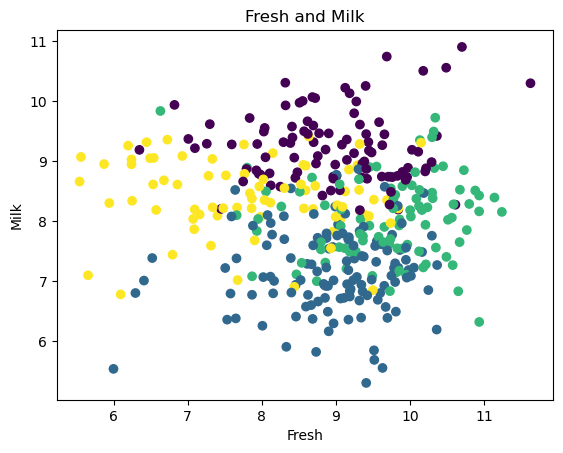

In [51]:
# Visualize the clusters using Fresh and Milk
plt.scatter(km_data['Fresh'], km_data['Milk'], c=km_data['km_cluster'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh and Milk')
plt.show()

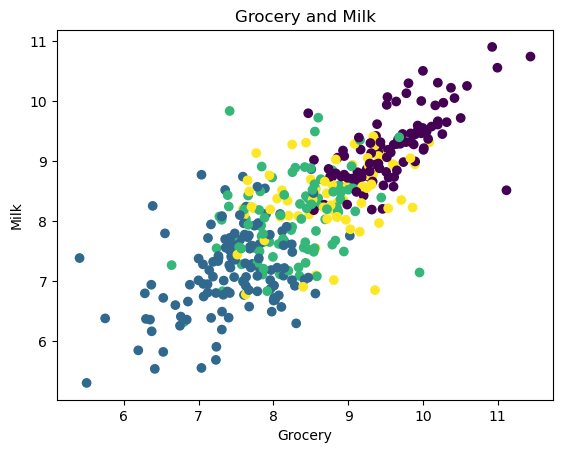

In [52]:
# Visualize the clusters using Grocery and Milk
plt.scatter(km_data['Grocery'], km_data['Milk'], c=km_data['km_cluster'])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.title('Grocery and Milk')
plt.show()

In [47]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[ 0.00746908  1.0960609   1.1475732  -0.13018622  1.12237559  0.66531928]
 [ 0.04201305 -0.92923257 -0.93989839  0.00980314 -0.85140641 -0.67065248]
 [ 0.68838422 -0.08703629 -0.17026294  0.88736404 -0.34065966  0.67439881]
 [-0.96315386  0.27750024  0.33506614 -0.9825774   0.43389262 -0.57905872]]


In [53]:
# We can check the mean of the products for each cluster
km_data.groupby('km_cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
km_cluster,,,,,,
0,8.941764,9.224419,9.578302,7.282297,8.593337,7.485592
1,8.980270,7.185992,7.468834,7.440278,5.417656,6.111302
2,9.700785,8.033650,8.246579,8.430626,6.239413,7.494932
3,7.859803,8.400550,8.757233,6.320354,7.485615,6.205523


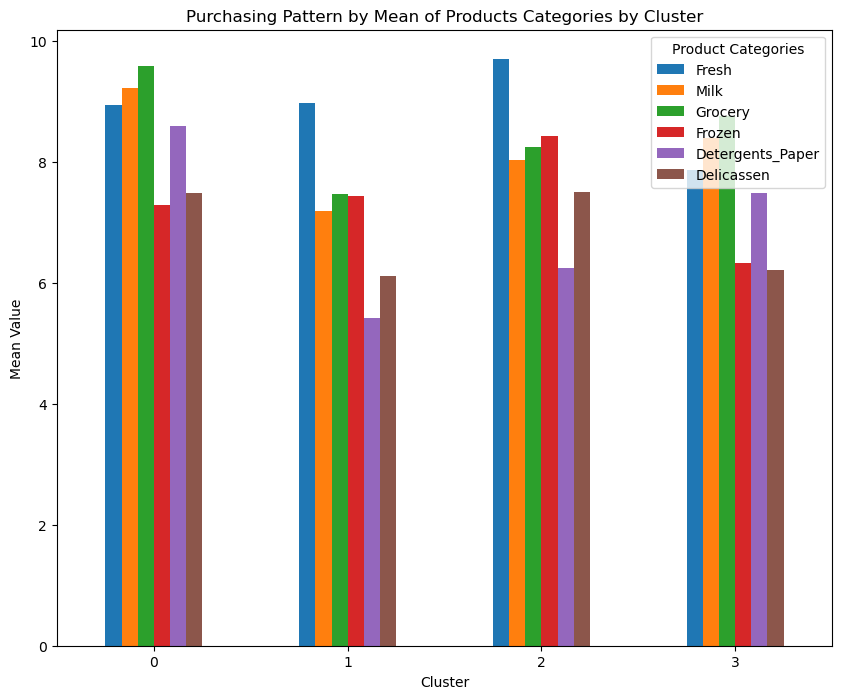

In [60]:
# Calculate the mean for each product per cluster
cluster_means = km_data.groupby('km_cluster').mean()

# Plot the bar chart
cluster_means.plot(kind='bar', figsize=(10,8))
plt.title('Purchasing Pattern by Mean of Products Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title="Product Categories")
plt.show()

1. Cluster 0: This cluster shows higher mean values for most product categories, particularly Grocery and Milk, suggesting a group with a preference for these items.

2. Cluster 1: This cluster has lower mean values for most products, particularly Milk and Grocery, indicating that customers in this group tend to purchase fewer dairy and grocery items.

3. Cluster 2: This cluster is characterized by higher values, especially for Fresh and Frozen, implying a greater demand for fresh produce and frozen products.

4. Cluster 3: Cluster 3 shows mid-range values for most categories, with Frozen and Delicassen being lower, suggesting this group has a more balanced but less intense demand for these product types.

Since the original data is multi-dimensional (6 features), we can apply PCA to reduce the data to two principal components for easier visualization. We can do that in Part IV - PCA, if we reduce our PCA to 2 components then we can visualize the clusters more clearly. 

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

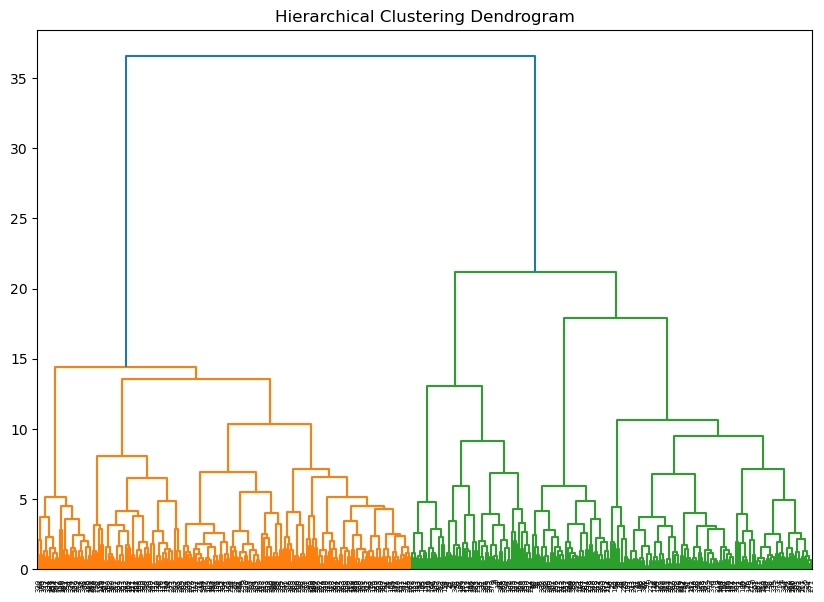

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Perform hierarchical clustering
linked = linkage(data_scaled, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(linked)
plt.show()

If we cut at 20 on the y-axis, we get 4 main clusters.

In [68]:
# We will cut the dendrogram to form 4 clusters
from scipy.cluster.hierarchy import fcluster

# We choose 4 clusters here
hc_clusters = fcluster(linked, t=4, criterion='maxclust')

# Create a copy of the original DataFrame and add the cluster labels to it
hc_data = data_clean.copy()
hc_data['hierarchical_cluster'] = hc_clusters

# Check the result
hc_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,hierarchical_cluster
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,4
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,4
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,4
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,4


In [71]:
# We can check the mean of the products for each cluster
hc_data.groupby('hierarchical_cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
hierarchical_cluster,,,,,,
1,8.847091,7.405468,7.628645,7.648707,5.591215,6.490000
2,8.320565,8.533077,9.021026,6.146070,7.755940,5.995074
3,10.103423,8.454906,8.621274,8.857565,6.568842,7.711777
4,9.008220,9.068855,9.440029,7.239585,8.502828,7.506039


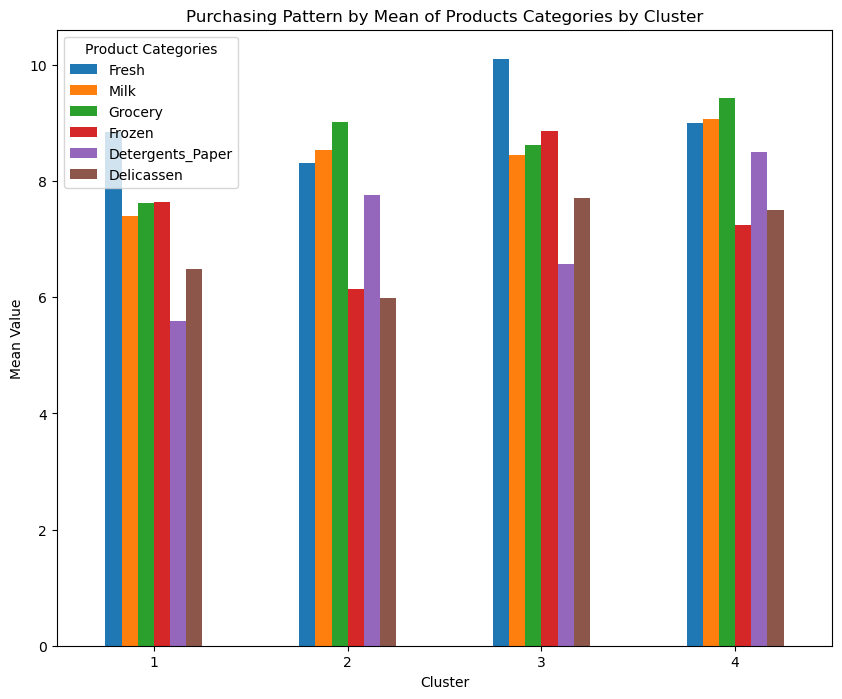

In [72]:
# Calculate the mean for each product per cluster
hc_cluster_means = hc_data.groupby('hierarchical_cluster').mean()

# Plot the bar chart
hc_cluster_means.plot(kind='bar', figsize=(10,8))
plt.title('Purchasing Pattern by Mean of Products Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title="Product Categories")
plt.show()

1. Cluster 1 appears to contain a mixture of product types, with balanced values across most features but lower scores in specialty categories like Detergents_Paper and Delicassen.
2. Cluster 2 leans more towards grocery and cleaning products, with less emphasis on frozen or delicatessen items.
3. Cluster 3 is dominated by fresh products, with a broad range of other product types.
4. Cluster 4 focuses on dairy and grocery products, with a significant emphasis on delicatessen items and cleaning supplies.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# First we standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [28]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio: ", explained_variance)

Explained Variance Ratio:  [0.44666809 0.25513235 0.11689477 0.10463747 0.04849684 0.02817048]


In [29]:
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'],)
print(explained_variance_df)

   Explained Variance
0            0.446668
1            0.255132
2            0.116895
3            0.104637
4            0.048497
5            0.028170


PC1 (0.4467): The first principal component explains 44.67% of the total variance. This means that PC1 captures the most important patterns in the data.

PC2 (0.2551): The second principal component explains 25.51% of the variance, which is still significant but less than PC1.

PC3 (0.1169): The third principal component explains 11.69% of the variance, and so on.

PC4 (0.1046), PC5 (0.0485), and PC6 (0.0282): The remaining components explain smaller amounts of the variance.

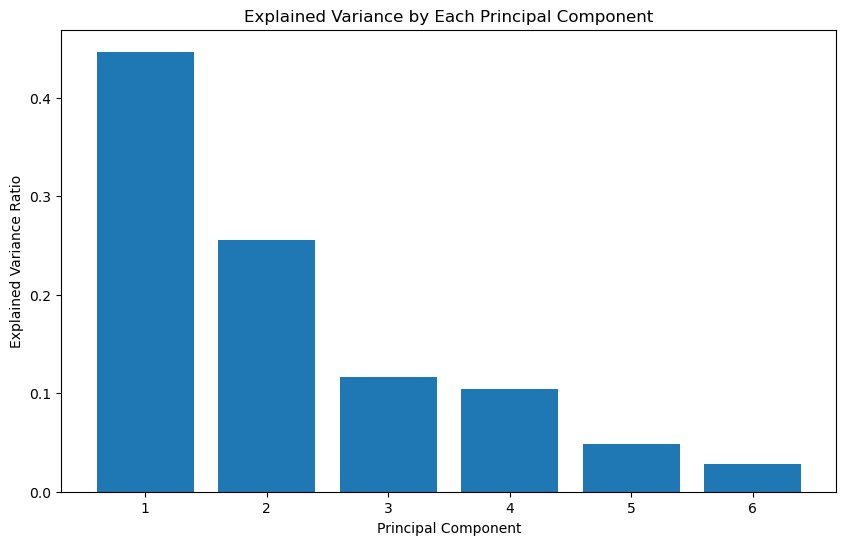

In [74]:
# Plotting the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()

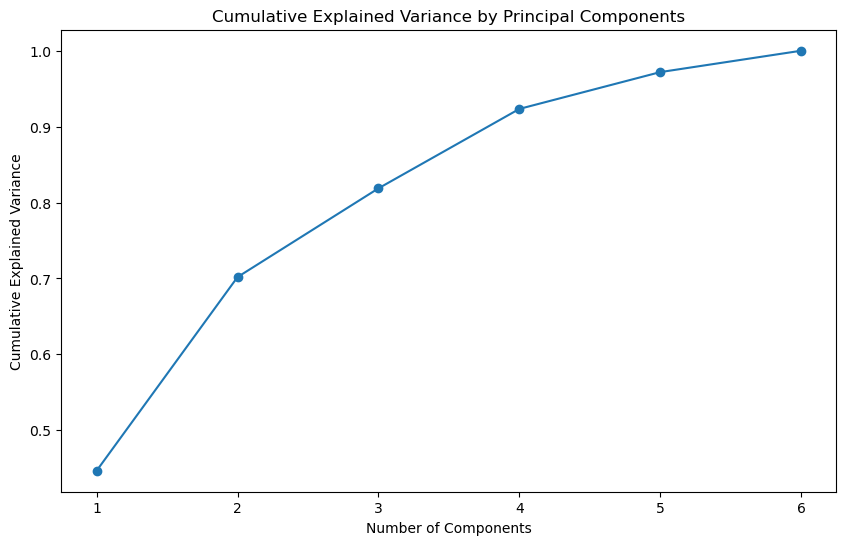

In [31]:
# Plot the cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.show()

In [76]:
# Number of components that explain 95% amount of variance
print(f"Number of components explaining 95% variance: {len(cumulative_variance[cumulative_variance <= 0.95])}")

# Number of components that explain 80% amount of variance
print(f"Number of components explaining 80% variance: {len(cumulative_variance[cumulative_variance <= 0.80])}")

Number of components explaining 95% variance: 4
Number of components explaining 80% variance: 2


In [77]:
# Access the component loadings
components = pca.components_

# Create a df
component_df = pd.DataFrame(components, columns=data.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])

# Display the components
print(component_df)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
PC1 -0.079393  0.547535  0.569810 -0.112182          0.534789    0.265773
PC2  0.596070  0.072345  0.006930  0.617320         -0.110066    0.496206
PC3 -0.740458  0.020813 -0.155007  0.208548         -0.211669    0.582208
PC4  0.293124 -0.053599 -0.075360 -0.748785         -0.243866    0.534206
PC5  0.012300  0.755018 -0.044421 -0.016666         -0.608805   -0.238542
PC6 -0.063611 -0.348732  0.802240  0.043380         -0.476412   -0.043591


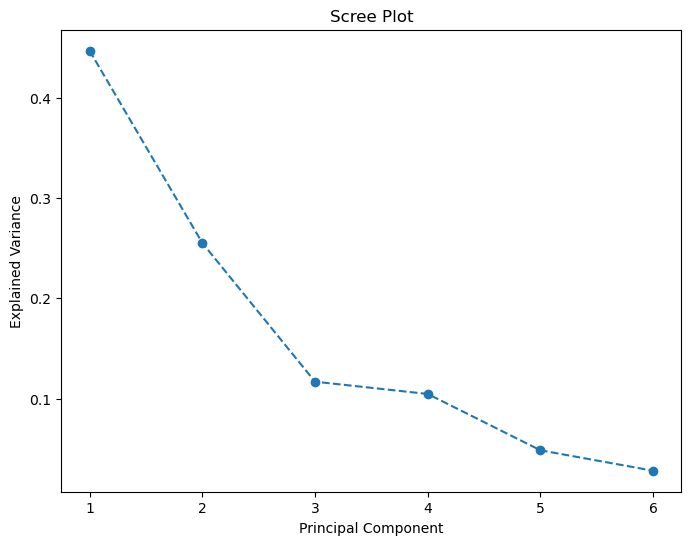

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

Now we will apply PCA with KMeans Cluster for visualization, we will consider 2 principal components for PCA, and for KMeans we will have 4 clusters.

In [79]:
# Apply PCA to reduce the dimensions to 2 components
pca_2 = PCA(n_components=2)
pca_data = pca_2.fit_transform(data_scaled)

In [81]:
pca_data[:3]

array([[ 1.50038281, -0.65842692],
       [ 1.61621753,  0.30702437],
       [ 1.81606526,  1.1237797 ]])

In [82]:
kmeans_2 =KMeans(n_clusters=4, random_state=42)

In [83]:
kmeans_labels = kmeans.fit_predict(pca_data)

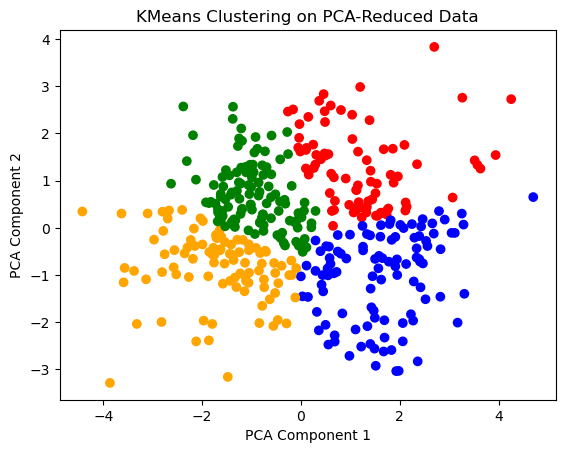

In [91]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["blue", "green", "orange", "red"])
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap=cmap)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering on PCA-Reduced Data')

plt.show()

In [92]:
# Access the component loadings
components_2 = pca_2.components_

# Create a df
component_df_2 = pd.DataFrame(components_2, columns=data.columns, index=[f'PC{i+1}' for i in range(components_2.shape[0])])

# Display the components
print(component_df_2)

        Fresh      Milk  Grocery    Frozen  Detergents_Paper  Delicassen
PC1 -0.079393  0.547535  0.56981 -0.112182          0.534789    0.265773
PC2  0.596070  0.072345  0.00693  0.617320         -0.110066    0.496206


1. PC1 (Principal Component 1) is primarily influenced by Milk, Grocery, and Detergents_Paper. These features have a strong positive correlation with PC1, meaning that products with higher values in these categories tend to have higher values in PC1. On the other hand, Fresh and Frozen have weaker negative relationships with PC1.

2. PC2 (Principal Component 2) is mainly influenced by Fresh and Frozen, which have strong positive correlations with PC2, indicating that these products are most associated with this component. Delicassen also contributes moderately to PC2. In contrast, Milk, Grocery, and Detergents_Paper have weaker or negative relationships with PC2.

PC1 captures the variance associated with Milk, Grocery, and Detergents_Paper, while PC2 focuses on Fresh and Frozen.

In [ ]:
# Get the loadings for PC1
pc1_loadings = pca_2.components_[0]

# Create a df
pc1_abs_loadings = pd.DataFrame({
    'Feature': data_clean.columns,
    'Absolute Loading (PC1)': abs(pc1_loadings)
})

# Sort the df
pc1_abs_loadings_sorted = pc1_abs_loadings.sort_values(by='Absolute Loading (PC1)', ascending=False)


pc1_abs_loadings_sorted

,Feature,Absolute Loading (PC1)
2,Grocery,0.569810
1,Milk,0.547535
4,Detergents_Paper,0.534789
5,Delicassen,0.265773
3,Frozen,0.112182
0,Fresh,0.079393


In [ ]:
# Get the loadings for PC2
pc2_loadings = pca_2.components_[1]

# Create a df
pc2_abs_loadings = pd.DataFrame({
    'Feature': data_clean.columns,
    'Absolute Loading (PC2)': abs(pc2_loadings)
})

# Sort the df
pc2_abs_loadings_sorted = pc2_abs_loadings.sort_values(by='Absolute Loading (PC2)', ascending=False)


pc2_abs_loadings_sorted

,Feature,Absolute Loading (PC2)
3,Frozen,0.617320
0,Fresh,0.596070
5,Delicassen,0.496206
4,Detergents_Paper,0.110066
1,Milk,0.072345
2,Grocery,0.006930


1. Grocery (0.569810), Milk (0.547535), and Detergents_Paper (0.534789) have the largest absolute loadings, indicating these features contribute most significantly to PC1. These are strongly correlated features, likely capturing a dimension of retail or household supply consumption.
2. Frozen (0.617320), Fresh (0.596070), and Delicassen (0.496206) also contributes significantly in PC2. Representing a fresh and frozen product dimension focused on perishable or specialty items, differentiating businesses or customers that prioritize fresh and frozen goods.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

* The original data's positive skew means most customers or businesses have relatively low annual spending, while a smaller number of customers have very high spending and large proportion of revenue comes from these high spenders. 
* Milk and Grocery have a strong positive correlation of 0.78, meaning as milk sales increase, grocery sales tend to increase as well. Detergents_Paper and Grocery also show a strong positive correlation of 0.79, suggesting that these two categories are likely to be purchased together.
* The wholesale data can be divided into 2 main groups. Group 1 of products commonly purchased together are retail items (grocery, milk, detergents), likely driven by household or retail supply needs.
* Group 2 of products are associated with perishables and specialty products (frozen, fresh, delicatessen), distinguishing another aspect of consumer behavior.